In [1]:
import torch

print("CUDA available: ", torch.cuda.is_available())
print("CUDA version: ", torch.version.cuda)
print("CUDA device count: ", torch.cuda.device_count())

for i in range(torch.cuda.device_count()):
    print("CUDA device ", i, " name: ", torch.cuda.get_device_name(i))

CUDA available:  True
CUDA version:  12.1
CUDA device count:  8
CUDA device  0  name:  NVIDIA GeForce RTX 3090
CUDA device  1  name:  NVIDIA GeForce RTX 3090
CUDA device  2  name:  NVIDIA GeForce RTX 3090
CUDA device  3  name:  NVIDIA GeForce RTX 3090
CUDA device  4  name:  NVIDIA GeForce RTX 3090
CUDA device  5  name:  NVIDIA GeForce RTX 3090
CUDA device  6  name:  NVIDIA GeForce RTX 3090
CUDA device  7  name:  NVIDIA GeForce RTX 3090


## Plot Graphs

finetune
Epoch 10: 73.39±1.02
Epoch 20: 74.57±1.18
Epoch 30: 74.78±0.67
Epoch 40: 75.69±1.37
Epoch 50: 75.96±0.68
Epoch 60: 75.39±1.29
Epoch 70: 76.02±2.01
Epoch 80: 76.15±0.73
Epoch 90: 75.77±1.75
Epoch 100: 75.17±0.83
Epoch 110: 75.38±0.77
Epoch 120: 76.32±1.50
Epoch 130: 75.30±1.42
Epoch 140: 75.64±2.12
Epoch 150: 74.51±2.48
Epoch 160: 74.62±2.41
Epoch 170: 74.61±1.38
Epoch 180: 73.98±1.55
Epoch 190: 74.68±0.67
Epoch 200: 73.80±2.19
Epoch 300: 74.72±1.17
Epoch 400: 72.49±1.52
Epoch 500: 73.12±3.33
Epoch 600: 70.52±1.76
Epoch 700: 71.76±1.59
Epoch 800: 67.01±3.16
Epoch 900: 68.00±3.49
Epoch 1000: 70.05±2.79
Best F1-score: 76.32±1.50 at epoch 120
DANN-tune
Epoch 10: 71.12±1.73
Epoch 20: 75.64±0.81
Epoch 30: 74.46±1.04
Epoch 40: 74.28±2.23
Epoch 50: 73.97±2.10
Epoch 60: 74.67±2.15
Epoch 70: 73.60±2.44
Epoch 80: 69.45±5.33
Epoch 90: 71.53±3.16
Epoch 100: 73.13±1.78
Epoch 110: 72.03±2.83
Epoch 120: 70.31±2.86
Epoch 130: 70.11±1.81
Epoch 140: 71.40±1.98
Epoch 150: 71.80±1.20
Epoch 160: 70

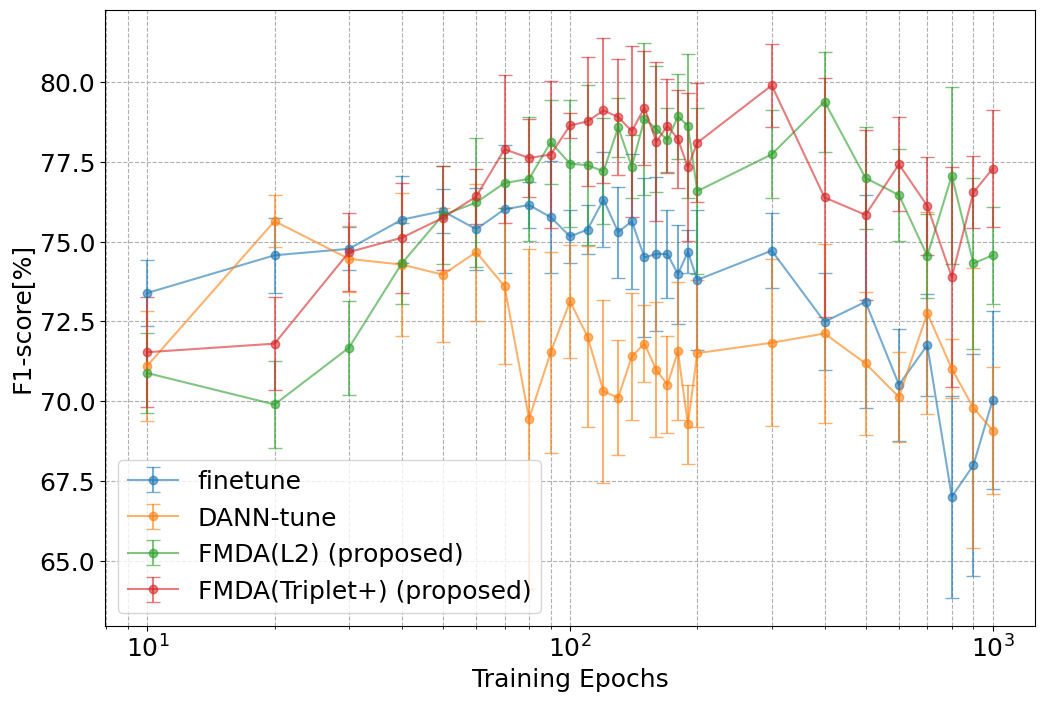

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from common import param

epochs = np.array(param.test_epochs)

# Data for different tuning methods
fine_tune = np.loadtxt("result/new/cucumber/10leak/5fold/finetune_scores.csv", delimiter=",", dtype="float64")
dann_tune = np.loadtxt("result/new/cucumber/10leak/5fold/dann_tune_scores.csv", delimiter=",", dtype="float64")
dist_tune = np.loadtxt("result/new/cucumber/10leak/5fold/dist_tune_scores.csv", delimiter=",", dtype="float64")
triplet_tune = np.loadtxt("result/new/cucumber/10leak/5fold/triplet_tune_scores.csv", delimiter=",", dtype="float64")


# Calculate mean and standard deviation for each tuning method
np.set_printoptions(precision=2, floatmode='fixed')

mean_fine_tune = np.mean(fine_tune, axis=0)
std_fine_tune = np.std(fine_tune, axis=0)
print("finetune")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_fine_tune[i]:.2f}±{std_fine_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_fine_tune):.2f}±{std_fine_tune[np.argmax(mean_fine_tune)]:.2f} at epoch {epochs[np.argmax(mean_fine_tune)]}")

mean_dann_tune = np.mean(dann_tune, axis=0)
std_dann_tune = np.std(dann_tune, axis=0)
print("DANN-tune")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_dann_tune[i]:.2f}±{std_dann_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_dann_tune):.2f}±{std_dann_tune[np.argmax(mean_dann_tune)]:.2f} at epoch {epochs[np.argmax(mean_dann_tune)]}")

mean_dist_tune = np.mean(dist_tune, axis=0)
std_dist_tune = np.std(dist_tune, axis=0)
print("FMDA(L2)")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_dist_tune[i]:.2f}±{std_dist_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_dist_tune):.2f}±{std_dist_tune[np.argmax(mean_dist_tune)]:.2f} at epoch {epochs[np.argmax(mean_dist_tune)]}")

mean_triplet_tune = np.mean(triplet_tune, axis=0)
std_triplet_tune = np.std(triplet_tune, axis=0)
print("FMDA(Triplet+)")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_triplet_tune[i]:.2f}±{std_triplet_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_triplet_tune):.2f}±{std_triplet_tune[np.argmax(mean_triplet_tune)]:.2f} at epoch {epochs[np.argmax(mean_triplet_tune)]}")

# Plotting the results
plt.rcParams["font.size"] = 18
plt.figure(figsize=(12, 8))

# Fine-tune
plt.errorbar(epochs, mean_fine_tune, yerr=std_fine_tune, fmt='-o', alpha=0.6, capsize=5, label='finetune')

# DANN
plt.errorbar(epochs, mean_dann_tune, yerr=std_dann_tune, fmt='-o', alpha=0.6, capsize=5, label='DANN-tune')

# FMDA
plt.errorbar(epochs, mean_dist_tune, yerr=std_dist_tune, fmt="-o", alpha=0.6, capsize=5, label="FMDA(L2) (proposed)")

# 3-FMDA
plt.errorbar(epochs, mean_triplet_tune, yerr=std_triplet_tune, fmt="-o", alpha=0.6, capsize=5, label="FMDA(Triplet+) (proposed)")

plt.xscale("log")

plt.xlabel('Training Epochs')
plt.ylabel('F1-score[%]')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Count Dataset

In [2]:
import os
import re

DOMAINS = {
    "03",
    "04",
    "07",
    "08",
    "09",
    "10",
    "11",
    "15",
    "16",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "26",
    "28",
    "34",
    "37",
    "39",
    "42",
    "43",
    "45",
    "46",
    "51",
    "52",
    "53",
    "61",
    "62",
    "81",
    "82",
    "82",
    "84",
}
dataset_paths = [
    "/data2/eto/Dataset/leaf_face/cucumber",
    "/data2/eto/Dataset/leaf_face/eggplant",
    "/data2/eto/Dataset/leaf_face/tomato",
]

# ファイル名からドメインラベルを取得できる正規表現 (例: "030000_YYYYMMDDhhmmss_01.jpg", "071050_20190123134256_01.JPG")
domain_pattern = re.compile(r"^\d{2}\d*_20\d{12}_\w*")

# 各クラスの画像数をカウント
# 画像のファイル名の先頭2文字をドメインラベルとして各クラスごとにセットに格納
count_all = 0
classes_all = set()
domains_all = set()

for dataset_path in dataset_paths:
    for phase in ["train", "test"]:
        phase_path = os.path.join(dataset_path, phase)
        dirs = os.listdir(phase_path)
        dirs.sort()
        count_phase = 0
        domains_phase = set()
        print(f"== {dataset_path}/{phase} ==")
        for dir in dirs:
            if os.path.isdir(os.path.join(phase_path, dir)):
                count = 0
                domains = set()
                classes_all.add(dir)
                for file in os.listdir(os.path.join(phase_path, dir)):
                    count += 1

                    if domain_pattern.match(file):
                        domains.add(file[:2])

                domains = domains & DOMAINS

                print(f"{dir}: {count} images, {len(domains)}:{sorted(domains)}")
                count_all += count
                domains_all.update(domains)
                count_phase += count
                domains_phase.update(domains)
        print(f"Total-{phase}: {count_phase} images, {len(domains_phase)}:{sorted(domains_phase)}")

print(f"Total-across: {count_all} images, {len(domains_all)}:{sorted(domains_all)}")
print(sorted(classes_all))


== /data2/eto/Dataset/leaf_face/cucumber/train ==
00_HEALTHY: 16023 images, 5:['07', '11', '23', '45', '51']
01_Powdery_Mildew: 7764 images, 4:['07', '11', '23', '45']
02_Gray_Mold: 643 images, 1:['11']
03_Anthracnose: 3038 images, 1:['07']
08_Downy_Mildew: 6953 images, 3:['07', '11', '45']
09_Corynespora_Leaf_Spot: 7565 images, 4:['07', '11', '23', '45']
17_Gummy_Stem_Blight: 1483 images, 2:['07', '23']
20_Bacterial_Spot: 4362 images, 2:['07', '51']
22_CCYV: 5969 images, 1:['11']
23_Mosaic_diseases: 26861 images, 1:['11']
24_MYSV: 17239 images, 5:['11', '23', '39', '45', '51']
Total-train: 97900 images, 6:['07', '11', '23', '39', '45', '51']
== /data2/eto/Dataset/leaf_face/cucumber/test ==
00_HEALTHY: 5576 images, 2:['20', '39']
01_Powdery_Mildew: 1898 images, 2:['20', '39']
02_Gray_Mold: 167 images, 1:['23']
03_Anthracnose: 77 images, 0:[]
08_Downy_Mildew: 2579 images, 2:['20', '39']
09_Corynespora_Leaf_Spot: 1813 images, 2:['20', '39']
17_Gummy_Stem_Blight: 374 images, 1:['39']
20_B